In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/reed_uk_v2.csv")

In [3]:
df.columns

Index(['category', 'city', 'company_name', 'geo', 'job_board',
       'job_description', 'job_requirements', 'job_title', 'job_type',
       'post_date', 'salary_offered', 'state', 'min_salary', 'max_salary',
       'periodicity', 'annum_avg_salary'],
      dtype='object')

As seen in the EDA the annum_avg_salary has some errors that need to be fixed in order to have more reliable data before implementing the model. 
Most of the issues seem to be related to higher salaries, so we are going to manually inspect the top 50 salaries to find those issues

In [4]:
df.sort_values("annum_avg_salary", ascending=False)[["job_title","job_description", "salary_offered", "annum_avg_salary"]].head(50)

,job_title,job_description,salary_offered,annum_avg_salary
20776,HR Advisor,Apply now HR Advisors needed for temporary/co...,"£30,000.00 - £35,000.00 per hour",54275000.00
15214,Primary School Teacher,Apply now As a Key Stage 2 class teacher you ...,"£22,000.00 - £38,000.00 per hour",50100000.00
14867,Key Stage One Class Teacher | September 2018 |,Apply now Key Stage 1 Class Teacher required ...,"£22,000.00 - £38,000.00 per hour",50100000.00
21806,Resourcing Advisor,Apply now ** Recruitment Advisors Wanted **Re...,"£23,000.00 - £32,000.00 per hour",45925000.00
23679,Resourcing Advisor,Apply now ** Recruitment Advisors Wanted **Re...,"£23,000.00 - £32,000.00 per hour",45925000.00
34057,Accounts Assistant,"Apply now Are you studying or part qualified,...","£23,000.00 - £26,000.00 per hour",40915000.00
19809,Trainer,Apply now Calling all trainers! Can you offer...,"£23,000.00 - £25,000.00 per hour",40080000.00
37964,SENIOR FINANCE MANAGER,Apply now REED Finance official supply partne...,£450.00 - £500.00 per hour,793250.00
25238,Assistant Manager,Apply now Job Title: Store ManagerLocation: C...,"£562,680 - £725,400 per annum",644040.00
25790,Regional Manager - Funeral Care,Apply now Job Title: Regional ManagerÂ - Fune...,"£552,000 - £660,000 per annum",606000.00


In the highest annum average salaries we found the next anomalies:
1. Very high salary per hour (> 20k), it probably corresponds to the annum salary.

Approach to correct the error: assuming salary is per annum instead of per hour


2. Very high difference between min and max salary within low salaries (more than 100k, for example, £ 80,000 - £ 650,000 per annum) It's probably a typo mistake

Approach to correct the error: For those salaries with large min-max difference, we will use the min salary instead of the average

3. High prices per hour> 200 that doesn't make sense with the job_title, these cases could be outliers
Approach: These cases are harder to correctly address, so for now we are not taking any corrective action. Maybe when building the model we can try excluding the outliers to get a better performance

Further analysis is needed in order to identify other issues with the average annual salary, but for now, we will address the ones mentioned here. 

1st apporach implementation

In [5]:
clean_df = df.copy()

In [6]:
#get indexes of rows with error
row_idxs = clean_df[(clean_df.periodicity == "hour") & (clean_df.min_salary > 20000)].index
#make corrections
clean_df.loc[row_idxs, "periodicity"] = "annum"
clean_df.loc[row_idxs, "annum_avg_salary"] = (clean_df.loc[row_idxs, "min_salary"] + clean_df.loc[row_idxs, "max_salary"]) / 2


2nd apporach implementation

In [7]:
row_idxs = clean_df[clean_df.max_salary - clean_df.min_salary > 100000].index
clean_df.loc[row_idxs, "annum_avg_salary"] = clean_df.loc[row_idxs, "min_salary"]

After cleaning the variable, the histogram looks a little bit clearer, however, we are not able to see the distribution of the data, so we are going to plot the histogram of the data within the quantile 95

In [8]:
clean_df.annum_avg_salary.hist()

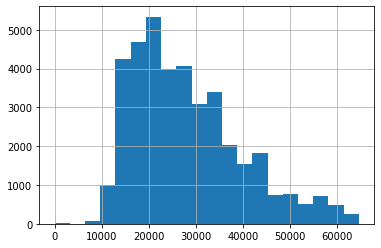

In [9]:
clean_df[clean_df.annum_avg_salary < clean_df.annum_avg_salary.quantile(0.95)].annum_avg_salary.hist(bins=20)

In [97]:
#saving the clean dataset
clean_df.to_csv("data/reed_uk_clean_v3.csv", index=False)